# Association Rule Learning

Ryan Kruse and Tharindu Lokukatagoda

### Install and Import

In [1]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=ab57757eaa699f114d1ac7b63c514b244da6f41dd30c1d7546a9fcec1c8a3bfd
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [20]:
import pandas as pd
from apyori import apriori
#We used matplotlib for visualizing results.
import matplotlib.pyplot as plt
import random

### Apyori: Basic example

This shows a simple example of the apyori package. We include this to show that it is working as expected.

In [3]:
transactions = [
    ['beer', 'nuts'],
    ['beer', 'cheese'],
]
results = list(apriori(transactions))
results

[RelationRecord(items=frozenset({'beer'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beer'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'cheese'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'cheese'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'nuts'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nuts'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'beer', 'cheese'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beer', 'cheese'}), confidence=0.5, lift=1.0), OrderedStatistic(items_base=frozenset({'beer'}), items_add=frozenset({'cheese'}), confidence=0.5, lift=1.0), OrderedStatistic(items_base=frozenset({'cheese'}), items_add=frozenset({'beer'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'nuts', 'beer'}),

### Read Data

Read the data from GitHub and store in pandas DataFrames.

In [4]:
biden = pd.read_csv('https://raw.githubusercontent.com/kruser1/twitter-apyori/main/twitter_biden.csv', error_bad_lines=False)
biden = biden.rename({'Unnamed: 0': 'account_following'}, axis=1)
biden = biden.set_index('account_following')
biden.head(3)

,Cris98101,Myayay_LoveMaze,prosecco_nbooks,Sundhar_twitzz,hshzz3_,NSVomhof,loveforarianab,hmsgqueens,AgunAlif,W65Doug,logan_meece,rafaeladavantel,discostck,mrcrowley89x,R6Ismael_,jordan8515,hwkfsh,letti093,xcvijp,Francis82122212,ranguangran47,bokar_bokoum,fabiopaleixo,julieannelecote,Ryan85502394,Holden80987844,MusicBuildz,cate8b_,josshdz00,ChrisXD_XD,LaylaRoyalhigh,makhaaya,haiderali6665,SamwichMitchell,inmavargas07,lustlovrs,Muhamma71840711,v5MXqUkRUlkxeUY,emmikealoha,billybobby_q,...,CraftyDiem,Georgin91751001,1404Stj,bowhogdid,MaryFra98932676,shuggaray2003,reveluvchuu,zak_risha,WILBURWLUV,joexkenshin,Camilocorreaca1,ChevalierRoldan,motiveleigh,Sillycar1,Classic_Sharp,juliejax8,HeatherGareth,SaitoYuheii,whoisann_x,Lizbeth63322638,sp1562,Hilarwar,jeffykuro,FekkakAnas,joandhoes,devonmiller96,VargJi,AmbadeAmbire,MOR03243051,JoHairyBidenLeg,MarcosC16192496,Blessin31966942,Sandral69149618,Tijee01,Pop_Quartz,nad111000,xlorengrxy,ari_soininen,ashpremium,NCordier62
account_following,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SenKamalaHarris,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PeteButtigieg,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
KamalaHarris,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0


In [5]:
trump = pd.read_csv('https://raw.githubusercontent.com/kruser1/twitter-apyori/main/twitter_trump.csv')
trump = trump.rename({'Unnamed: 0': 'account_following'}, axis=1)
trump = trump.set_index('account_following')
trump.head(3)

,Ribs23154805,fabozo1,IkengaPatrick,ikram21841464,mmszz,kyrre_isaksen,Kiki20114762,o_garet,SoniaRo29931619,Muhamma58924970,Sonu50513858,Ahmed76156798,KuinkelPushkar,mseahhmient,AdamsTwista,Adnanismael8,ADumitru7,edumartorell,CelentanoFilom1,AReplyGuy1,DavidStjepanov6,CmTjm0rrpY5gGZK,Amaka69369134,TFAWAJIAKASHI,Khaoula29089812,heathersparkes,OlasupoAdeniyi1,VSchouwenburg,Richard14113,BellDavy1,nancyjo23280541,AerospacNetwork,michael_anema,Carol10909465,ZAKIROX12345671,Robin51379173,Madilyn96014814,Antonio05932177,GMom76,mounisabdou,...,Salvato68760236,ennytao,JesseB168,julie05932405,SucyAishiteru,CoLbeZee,Whos_Jiana,BernadetteKoua8,jaxe29,clarisa_evelyn,dona_srt23,guga0121,ChristianSage15,Chipolino22,Selfieton,23_steps,AminaWahbi6,Scottnunweiler1,ElhamAtashkar,NoaBarry,OutlawTyrants,Tosin_Thompson,kiyunosuk,VictorS38864100,LaMbitMos,YolaCuevas2,hermit248,turpin_ronnie,mikerich_8,Edson30114703,khw88700706,fly2def,samusaniyowaiyo,jmz01,Shorty90649895,yayamanga4,Harald51465948,faamiab2k,Bah7rain313,marandaneel
account_following,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DanielRiolo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
realDonaldTrump,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
CNEWS,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Define Function
This function removes the JoeBiden or realDonaldTrump entry from the DataFrame and puts the data into a format compatible with the apyori.apriori() function.

In [6]:
def getAprioriData(df, name='JoeBiden'):
  data = []
  count = 0
  for col in df.columns:
    data.append([])
    for x in df.index:
      if x != name:
        if df.loc[x, col] == 1:
          data[count].append(x)
    count += 1
  return data

### Run Apriori

Here we run the apriori algorithm and print the resulting rules for each candidate.

In [7]:
data = getAprioriData(biden, 'JoeBiden')
resultsJ = list(apriori(data, min_support=.05))
resultsJ

[RelationRecord(items=frozenset({'AOC'}), support=0.14615384615384616, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'AOC'}), confidence=0.14615384615384616, lift=1.0)]),
 RelationRecord(items=frozenset({'ArianaGrande'}), support=0.15384615384615385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ArianaGrande'}), confidence=0.15384615384615385, lift=1.0)]),
 RelationRecord(items=frozenset({'BBCWorld'}), support=0.05384615384615385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'BBCWorld'}), confidence=0.05384615384615385, lift=1.0)]),
 RelationRecord(items=frozenset({'BarackObama'}), support=0.2076923076923077, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'BarackObama'}), confidence=0.2076923076923077, lift=1.0)]),
 RelationRecord(items=frozenset({'BernieSanders'}), support=0.08461538461538462, ordered_statistics=[OrderedStatistic(items_base=f

Examine one record more closely.

In [9]:
r = [x for x in resultsJ if len(x[0])>1]
print("Entire record:")
print(r[0])
print("\nItemset:")
print(r[0][0])
print("\nSupport for this itemset:")
print(r[0][1])
print("\nEmpty antecedent, both in consequent:")
print(r[0][2][0])
print("\nAntecedent: AOC; Consequent: BarackObama")
print(r[0][2][1])
print("\nAntecedent: BarackObama; Consequent: AOC")
print(r[0][2][2])

Entire record:
RelationRecord(items=frozenset({'BarackObama', 'AOC'}), support=0.06153846153846154, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'BarackObama', 'AOC'}), confidence=0.06153846153846154, lift=1.0), OrderedStatistic(items_base=frozenset({'AOC'}), items_add=frozenset({'BarackObama'}), confidence=0.42105263157894735, lift=2.02729044834308), OrderedStatistic(items_base=frozenset({'BarackObama'}), items_add=frozenset({'AOC'}), confidence=0.2962962962962963, lift=2.02729044834308)])

Itemset:
frozenset({'BarackObama', 'AOC'})

Support for this itemset:
0.06153846153846154

Empty antecedent, both in consequent:
OrderedStatistic(items_base=frozenset(), items_add=frozenset({'BarackObama', 'AOC'}), confidence=0.06153846153846154, lift=1.0)

Antecedent: AOC; Consequent: BarackObama
OrderedStatistic(items_base=frozenset({'AOC'}), items_add=frozenset({'BarackObama'}), confidence=0.42105263157894735, lift=2.02729044834308)

Antecedent: BarackObama; 

In [10]:
data = getAprioriData(trump, 'realDonaldTrump')
resultsT = list(apriori(data, min_support=.05))
resultsT

[RelationRecord(items=frozenset({'BBCBreaking'}), support=0.052083333333333336, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'BBCBreaking'}), confidence=0.052083333333333336, lift=1.0)]),
 RelationRecord(items=frozenset({'BarackObama'}), support=0.1875, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'BarackObama'}), confidence=0.1875, lift=1.0)]),
 RelationRecord(items=frozenset({'BillGates'}), support=0.07291666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'BillGates'}), confidence=0.07291666666666667, lift=1.0)]),
 RelationRecord(items=frozenset({'CNN'}), support=0.052083333333333336, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'CNN'}), confidence=0.052083333333333336, lift=1.0)]),
 RelationRecord(items=frozenset({'ChampionsLeague'}), support=0.0625, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset

### Define Plotting Functions

These functions will help us to visualize the resulting rules.

In [11]:
def getSupports(results):
  unames = []
  supports = []
  for r in results:
    if len(r[0]) == 1:
      unames.append(list(r[0])[0])
      supports.append(r[1])
  df = pd.DataFrame(columns=['account','support'])
  df['account'] = unames
  df['support'] = supports
  df = df.sort_values('support', ascending=False)
  return(df)

def plotSupports(df, title):
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
  ax.set_facecolor('#FFFFFF')
  ax.grid(axis='y', linestyle='--')
  ax.set_axisbelow(True)
  plt.bar(df['account'], df['support'], color=df['color'], edgecolor='black', alpha=.7)
  plt.ylabel("support", )
  plt.xticks(rotation=90)
  plt.title(title + "-associated Twitter Accounts")
  plt.ylim((0,.25))

def getColors(uname, df):
  if uname in ['JoeBiden','realDonaldTrump']:
    return('purple')
  if uname in df.account.values:
    x = df.index[df['account'] == uname].tolist()[0]
    return(x)
  return('#BBBBBB')

### Plot Support

This plot helps us to compare and contrast the resulting rules.

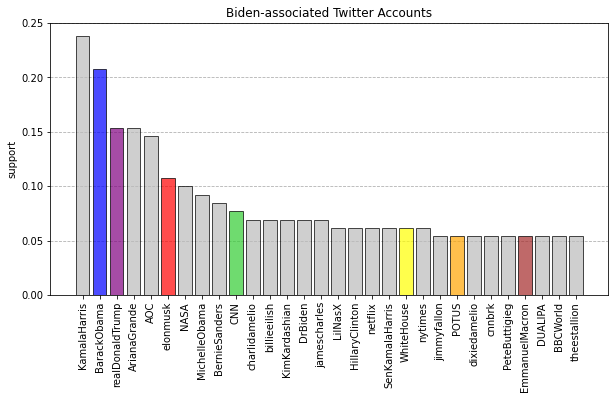

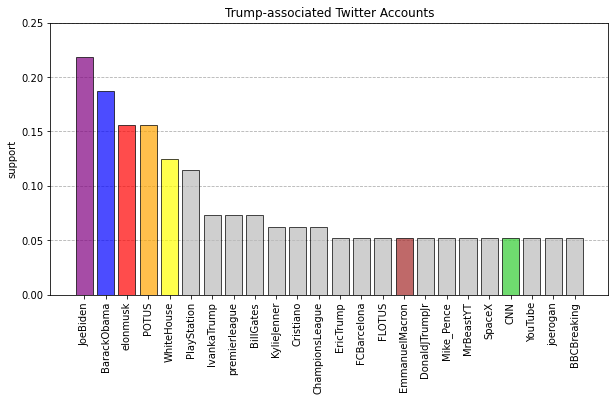

In [12]:
dfj = getSupports(resultsJ)
dft = getSupports(resultsT)

both = [x for x in dfj.account if x in dft.account.values]

dfj['color'] = dfj.apply(lambda row : getColors(row['account'], dft), axis=1)
dft['color'] = dft.apply(lambda row : getColors(row['account'], dfj), axis=1)

colors = ['blue','red','limegreen','yellow','orange','brown']
count = 0
for i, row in dfj[dfj['account'].isin(dft['account'])].iterrows():
  x = row['color']
  dfj.loc[i, 'color'] = colors[count]
  dft.loc[x, 'color'] = colors[count]
  count += 1

plotSupports(dfj, "Biden")
plotSupports(dft, "Trump")


In [23]:
def convertToDataFrame(rules):
  df = pd.DataFrame(columns = [
                          'itemset',
                          'support',
                          'antecedent',
                          'consequent',
                          'confidence',
                          'lift'])
  for r in rules:
    itemset = r[0]
    support = r[1]
    for x in r[2]:
      antecedent = x[0]
      consequent = x[1]
      confidence = x[2]
      lift = x[3]
      df = df.append({'itemset' : itemset, 'support' : support,
                                                  'antecedent' : antecedent, 'consequent' : consequent,
                                                  'confidence' : confidence, 'lift' : lift}, ignore_index=True)
  return(df)

In [24]:
def plot2(df, name):

  #declaring support and confidence variables
  support=df['support'].values
  confidence=df['confidence'].values

  #scatter plot
  for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
  
  #Visualizing results: Support vs Confidence
  plt.scatter(support, confidence,c=df['lift']/max(df['lift']), s=500,   alpha=0.5)
  plt.xlabel('support')
  plt.ylabel('confidence')
  plt.gray()
  plt.title(name + "-associated Rules")
  plt.show()

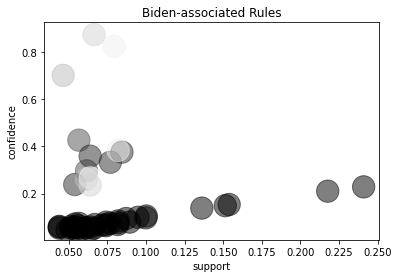

In [25]:
biden_results_df = convertToDataFrame(resultsJ)
plot2(biden_results_df, 'Biden')

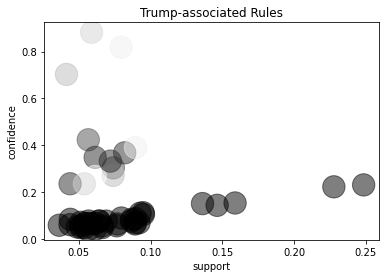

In [26]:
trump_results_df = convertToDataFrame(resultsT)
plot2(biden_results_df, 'Trump')

# The End